In [1]:
# Dependency imports
import re
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Notebook customizations
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_colwidth = -1
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-dadecfe0567b>:23: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.options.display.max_colwidth = -1


In [61]:
def heatMap(df, mirror):

   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(15, 6))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      #Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
      # Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
   plt.show()

In [40]:
df=pd.read_csv('drive/MyDrive/Dataset/Housing Price data set.csv')
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


<Axes: >

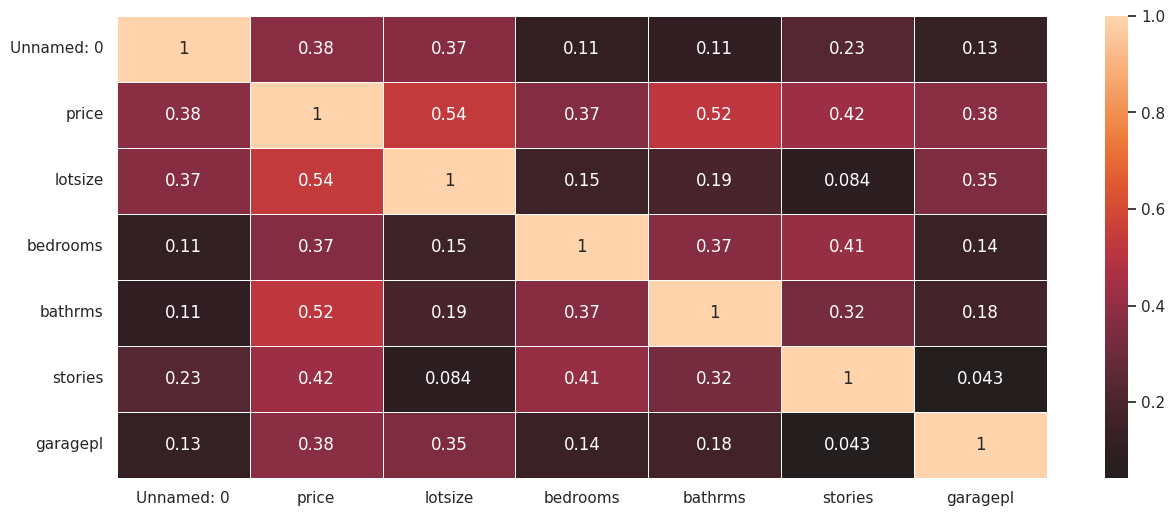

In [63]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(data=df.corr(), linewidths=0.5, center=0, annot=True, ax=ax)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   price       546 non-null    float64
 2   lotsize     546 non-null    int64  
 3   bedrooms    546 non-null    int64  
 4   bathrms     546 non-null    int64  
 5   stories     546 non-null    int64  
 6   driveway    546 non-null    object 
 7   recroom     546 non-null    object 
 8   fullbase    546 non-null    object 
 9   gashw       546 non-null    object 
 10  airco       546 non-null    object 
 11  garagepl    546 non-null    int64  
 12  prefarea    546 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 55.6+ KB


In [42]:
df.columns

Index(['Unnamed: 0', 'price', 'lotsize', 'bedrooms', 'bathrms', 'stories',
       'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl',
       'prefarea'],
      dtype='object')

In [43]:
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [44]:
target = df['price']

features = df[['lotsize', 'bedrooms', 'bathrms','stories', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea']]
# ADD CITY AND ZIP_CODE AS WELL, RIGHT NOW THEY ARE REMOVED
features.head()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,5850,3,1,2,yes,no,yes,no,no,1,no
1,4000,2,1,1,yes,no,no,no,no,0,no
2,3060,3,1,1,yes,no,no,no,no,0,no
3,6650,3,1,2,yes,yes,no,no,no,0,no
4,6360,2,1,1,yes,no,no,no,no,0,no


In [45]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=21)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [46]:
categorical_features = (features.dtypes == 'object')
numerical_features = ~categorical_features

In [47]:
categorical_features[categorical_features == True].index.tolist()

['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']

In [48]:
numerical_features


lotsize     True 
bedrooms    True 
bathrms     True 
stories     True 
driveway    False
recroom     False
fullbase    False
gashw       False
airco       False
garagepl    True 
prefarea    False
dtype: bool

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class CustomOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_features=None, reindex_columns=None):
        self.categorical_features = categorical_features
        self.reindex_columns = reindex_columns
        self.updated_feature_names = None
    
    def transform(self, X, **transformparams):
        #print (transformparams.get('arg1'))
        self.updated_feature_names = []
        hot_encoded_df = pd.get_dummies(data=X, columns=self.categorical_features, \
                                        drop_first=False).copy()
        # Lets reindex this thing, which will add any missing columns in the passed data
        print(hot_encoded_df.shape)
        hot_encoded_df = hot_encoded_df.reindex(columns=self.reindex_columns, fill_value=0)
        print(hot_encoded_df.shape)
        # Now we have reformed the encoded dataframe by filling any missing columns
        self.updated_feature_names = hot_encoded_df.columns
        return hot_encoded_df
    
    def fit(self, X, y=None, **fitparams):
        return self
    
    def get_feature_names(self):
        return self.updated_feature_names

In [50]:
columns_to_encode = categorical_features[categorical_features == True].index.tolist()

reindex_hot_encoding = []
# Iterating through all the columns in feature set
for column in features.columns:
    # If the column name is in the columns_to_encode list, append all the unique values of that column
    if column in columns_to_encode:
        # Ignore the first unique value, we drop it in reindex list instead of using drop=True in get_dummies later
        for count, item in enumerate(features[column].unique()):
            if count is not 0:
                reindex_hot_encoding.append(item)
    # If the column name is not in the columns_to_encode list, append the column name itself
    else:
        reindex_hot_encoding.append(column)
reindex_hot_encoding

['lotsize',
 'bedrooms',
 'bathrms',
 'stories',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'garagepl',
 'yes']

In [51]:
pipeline = Pipeline([
    # Preprocessor to perform necessary scaling on the data before running regression
    ('preprocess', ColumnTransformer(transformers=
        [
            ('hot_encoder', CustomOneHotEncoder(categorical_features=columns_to_encode, \
                                                reindex_columns=reindex_hot_encoding), features.columns)
        ]
    )),
    # Using linear regression modeling
    ('random_forest_reg', RandomForestRegressor(n_estimators=100, n_jobs=-1))
])

In [52]:
pipeline.fit(X_train, y_train)

(409, 17)
(409, 11)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('hot_encoder',
                                                  CustomOneHotEncoder(categorical_features=['driveway',
                                                                                            'recroom',
                                                                                            'fullbase',
                                                                                            'gashw',
                                                                                            'airco',
                                                                                            'prefarea'],
                                                                      reindex_columns=['lotsize',
                                                                                       'bedrooms',
                                                                                       'bathrms',
                                                                                       'stories',
                                                                                       'no',
                                                                                       'yes',
                                                                                       'no',
                                                                                       'yes',
                                                                                       'yes',
                                                                                       'garagepl',
                                                                                       'yes']),
                                                  Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway', 'recroom',
       'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object'))])),
                ('random_forest_reg', RandomForestRegressor(n_jobs=-1))])

In [54]:
predictions = pipeline.predict(X_test)


(137, 17)
(137, 11)


In [56]:
X_test.columns


Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway', 'recroom',
       'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [59]:
#adding new input data to test our model
new_input = [5800, 3, 1, 2, 'yes', 'no', 'yes', 'no', 'no', 1, 'no']

input_df = pd.DataFrame(data=[new_input], columns=X_test.columns)

In [60]:
outcome = pipeline.predict(input_df)
outcome

(1, 11)
(1, 11)


array([57026.83333333])